## Data Preview
These are some example plots of the data. Plots of no processing, a 5 hz lowpass filter, and both a lowpass filter + detrending are shown

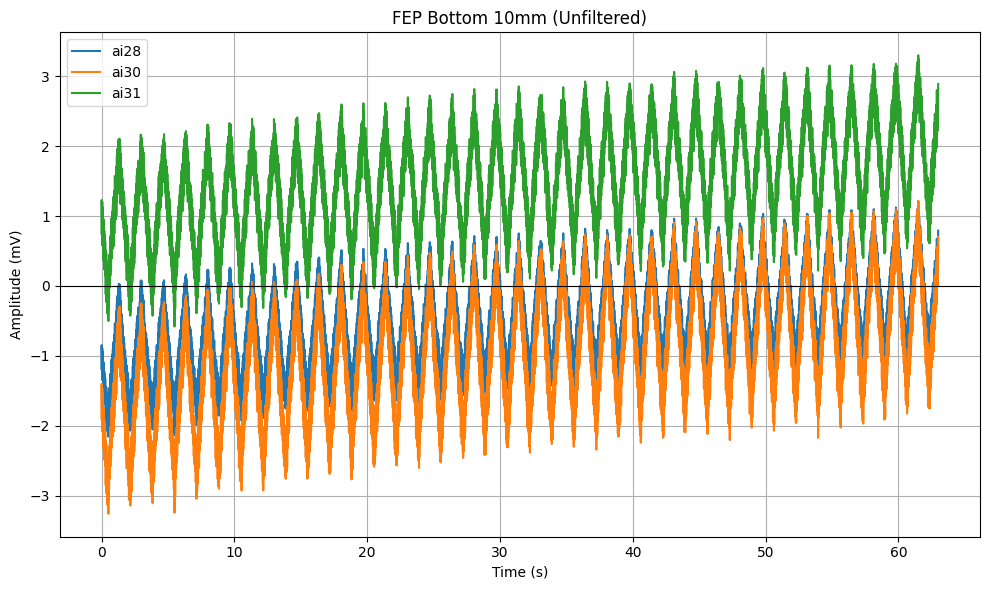

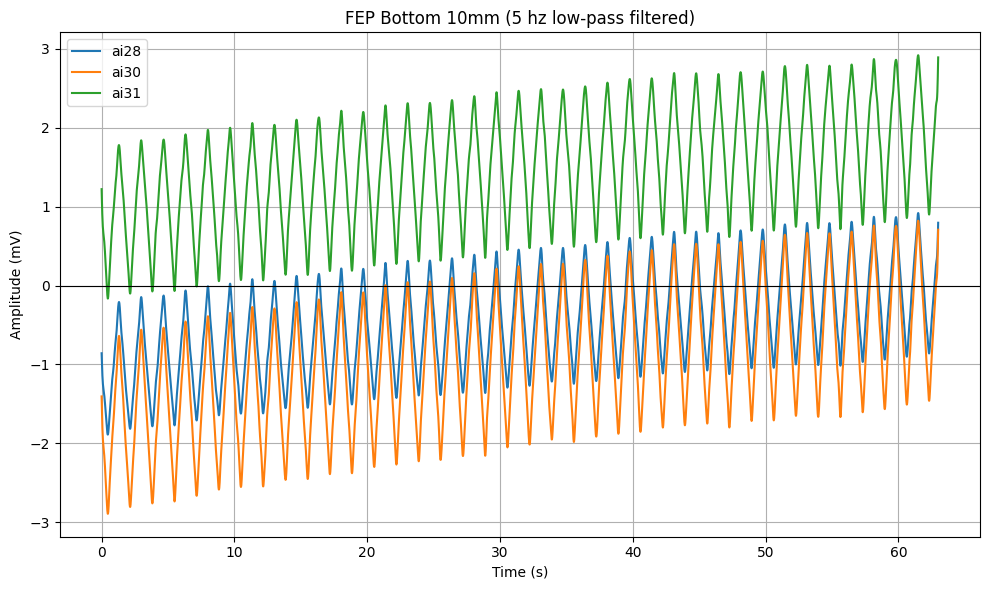

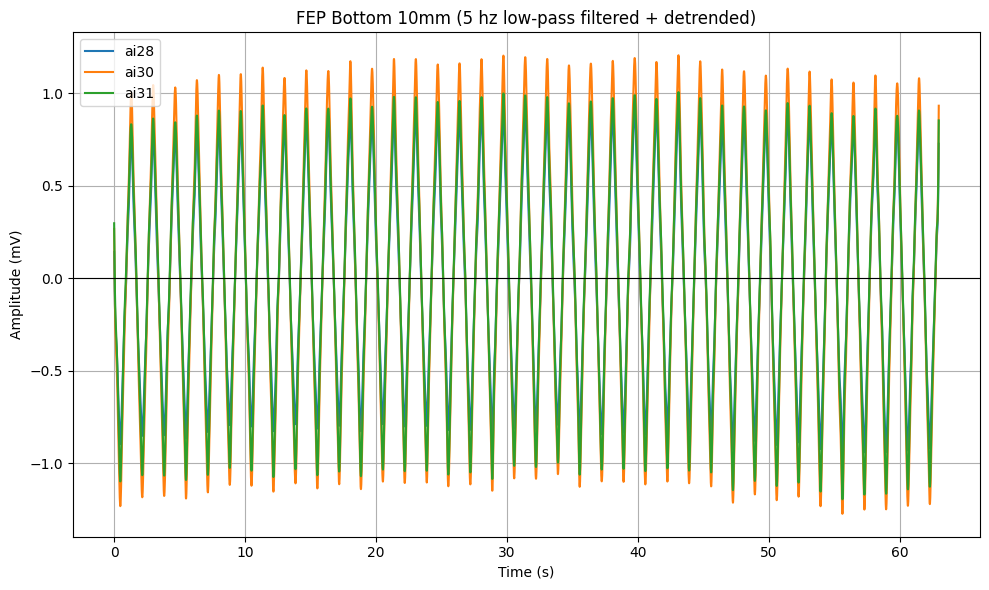

In [1]:
import os
import matplotlib.pyplot as plt
import sys, pathlib
proj_root = pathlib.Path().resolve().parent  
sys.path.append(str(proj_root))

from scripts.data_viewer import plot_file

base_path = r"C:\Users\chloe\OneDrive\Desktop\materials classification\20251103-materials"

FEP_bottom_10mm = os.path.join(base_path, r"Negative\FEP\FEP_bottom_10mm.csv")

fig, ax = plot_file(FEP_bottom_10mm, low_pass=False, detrend_data=False)
ax.set_title("FEP Bottom 10mm (Unfiltered)")
ax.axhline(0, color="black", linewidth=0.8)
plt.show()

fig, ax = plot_file(FEP_bottom_10mm, detrend_data=False)
ax.set_title("FEP Bottom 10mm (5 hz low-pass filtered)")
ax.axhline(0, color="black", linewidth=0.8)
plt.show()

fig, ax = plot_file(FEP_bottom_10mm)
ax.set_title("FEP Bottom 10mm (5 hz low-pass filtered + detrended)")
ax.axhline(0, color="black", linewidth=0.8)
plt.show()

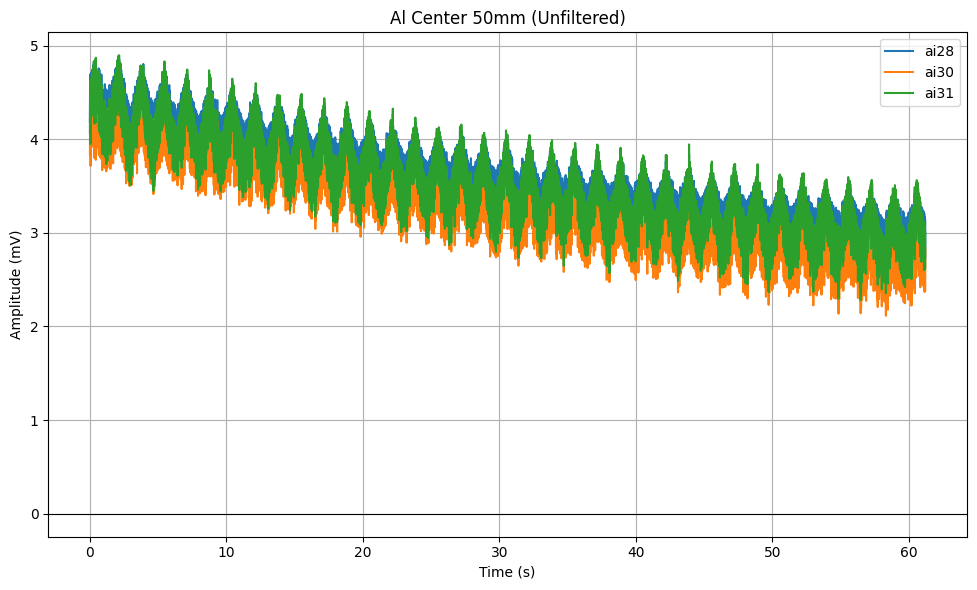

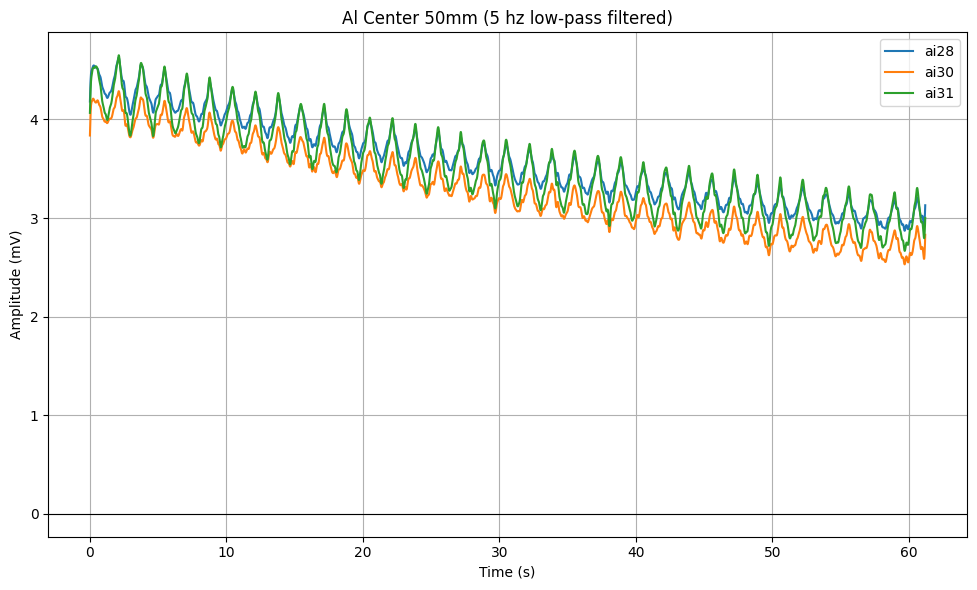

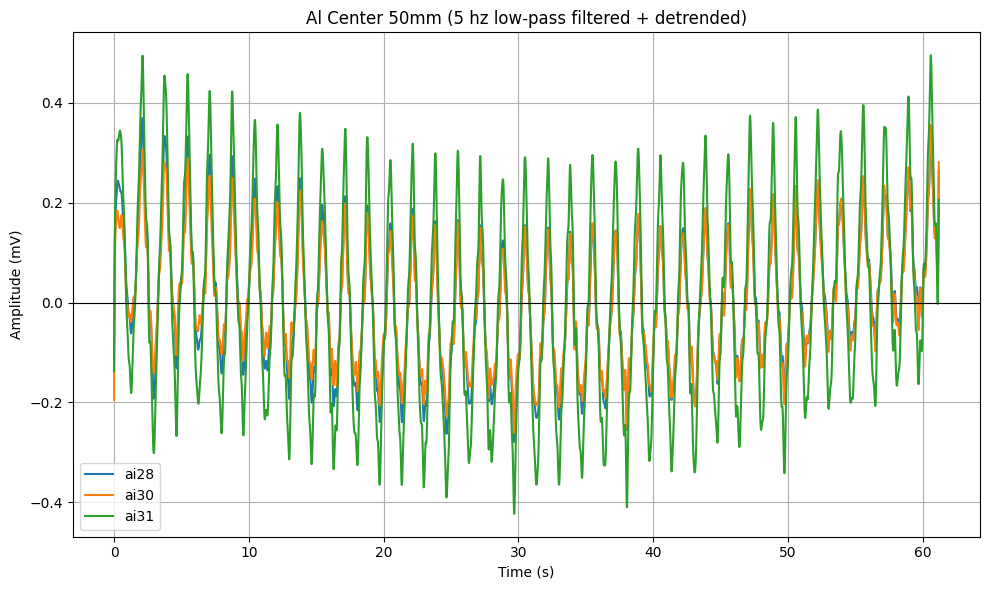

In [2]:
Al_center_50mm = os.path.join(base_path, r"Positive\Al\Al_50mm.csv")

fig, ax = plot_file(Al_center_50mm, low_pass=False, detrend_data=False)
ax.set_title("Al Center 50mm (Unfiltered)")
ax.axhline(0, color="black", linewidth=0.8)
plt.show()

fig, ax = plot_file(Al_center_50mm, detrend_data=False)
ax.set_title("Al Center 50mm (5 hz low-pass filtered)")
ax.axhline(0, color="black", linewidth=0.8)
plt.show()

fig, ax = plot_file(Al_center_50mm)
ax.set_title("Al Center 50mm (5 hz low-pass filtered + detrended)")
ax.axhline(0, color="black", linewidth=0.8)
plt.show()

## Filtering + Windowing
To process the data, a 5 hz low-pass filter is applied and the signal is detrended. Then the data is segmented by minimums. These windows are then separated to be used for feature extraction. The first and last windows are excluded. 

In [3]:
from scripts.window_extractor import lowpass_and_detrend, find_minima_indices, split_into_windows
import pandas as pd
import numpy as np

def plot_windows(input_path):
    df = pd.read_csv(input_path)

    df_preprocessed = lowpass_and_detrend(df)

    minima_indices = find_minima_indices(df_preprocessed)

    numeric_cols = df_preprocessed.select_dtypes(include=[np.number]).columns
    x = np.arange(len(df_preprocessed))

    plt.figure(figsize=(12, 6))
    for col in numeric_cols:
        plt.plot(x, df_preprocessed[col], label=str(col))

    for idx in minima_indices:
        plt.axvline(idx, color="red", linestyle="--", alpha=0.5)

    plt.xlabel("Index")
    plt.ylabel("Amplitude (mV)")
    if len(numeric_cols) > 0:
        plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

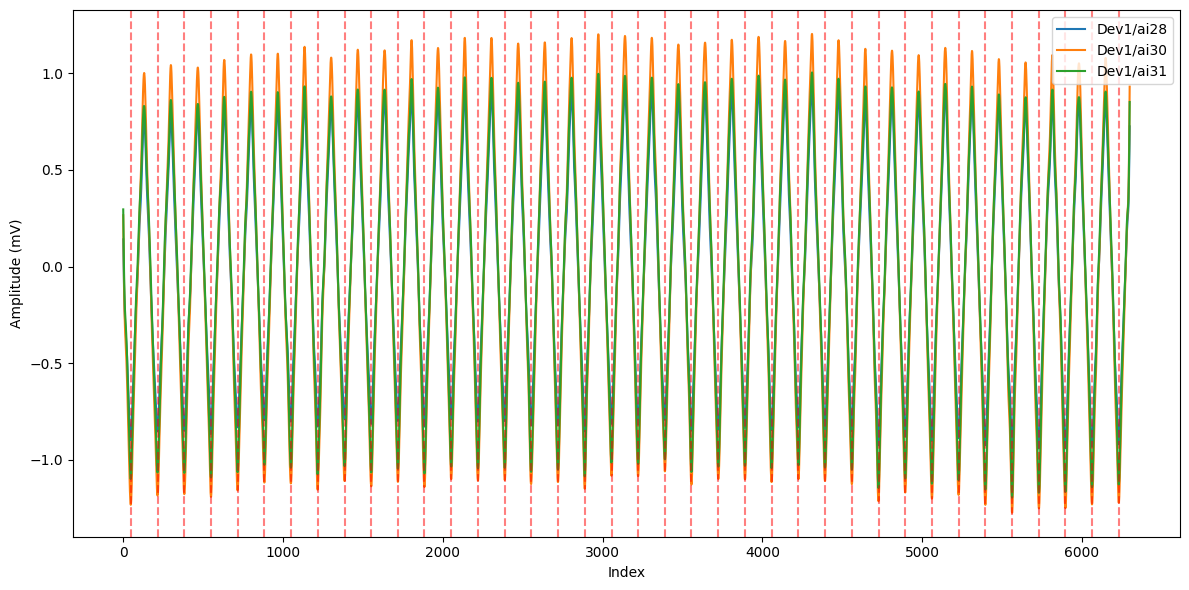

In [4]:
plot_windows(FEP_bottom_10mm)

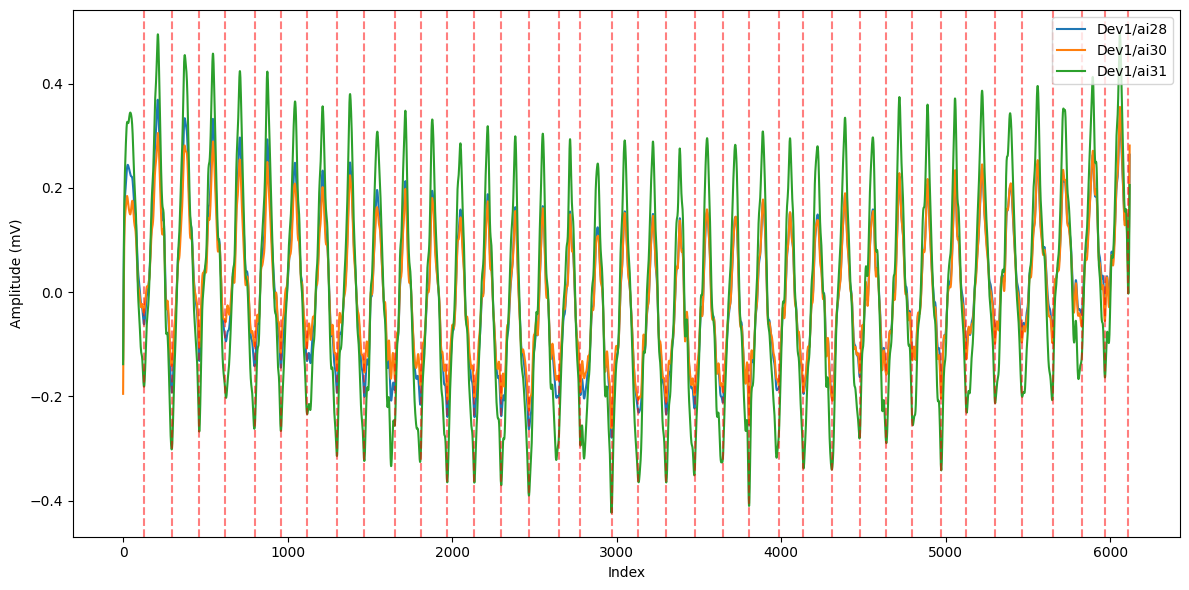

In [5]:
plot_windows(Al_center_50mm)